# Cap 6: Mchine Learning

## Primer punto

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# Generar dataset
np.random.seed(42)
X = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)  # Valores de entrada en el rango [-π, π]
y = np.cos(X).ravel()  # Valores de salida (coseno)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear modelo de regresión polinomial
degree = 10  # Elegimos un polinomio de grado 5 para aproximar mejor la función coseno
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

In [ ]:
# Probar el modelo con 10 valores nuevos
X_new = np.linspace(-np.pi, np.pi, 10).reshape(-1, 1)
y_pred = model.predict(X_new)
y_real = np.cos(X_new)

# Mostrar resultados
results = pd.DataFrame({"X": X_new.ravel(), "Cos(X) Real": y_real.ravel(), "Cos(X) Predicho": y_pred.ravel()})
results

X  Cos(X) Real  Cos(X) Predicho
0 -3.141593    -1.000000        -1.000004
1 -2.443461    -0.766044        -0.766045
2 -1.745329    -0.173648        -0.173648
3 -1.047198     0.500000         0.500000
4 -0.349066     0.939693         0.939692
5  0.349066     0.939693         0.939693
6  1.047198     0.500000         0.500000
7  1.745329    -0.173648        -0.173649
8  2.443461    -0.766044        -0.766045
9  3.141593    -1.000000        -1.000001

## Segundo punto

Este código implementa un clasificador de Máquinas de Vectores de Soporte (SVM) para predecir si un tumor es benigno o maligno
utilizando el dataset de cáncer de mama de `sklearn`.

El modelo SVM con un kernel lineal logra una alta precisión en la clasificación de tumores malignos y benignos. La matriz de confusión y el reporte de clasificación
permiten evaluar el desempeño en términos de precisión, recall y F1-score.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Cargar el dataset de cáncer de mama
cancer = load_breast_cancer()
X = cancer.data  # Características del tumor
y = cancer.target  # Etiquetas: 0 (maligno), 1 (benigno)

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador SVM con un kernel lineal
svm_classifier = SVC(kernel='linear', C=1)

# Entrenar el clasificador con los datos de entrenamiento
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Evaluar el clasificador calculando la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.96
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Matriz de Confusión:
[[39  4]
 [ 1 70]]


## Tercer punto

### Árboles de decisión
Para un ejemplo simple utilizando árboles de decisión, vamos a clasificar tres especies que tienen cuatro características. Estas especies pertenecen al dataset Iris, comúnmente utilizado para ejemplificar estos problemas de clasificación e incluso algunos otros como minería de datos.  

In [ ]:
# Importar librerias
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crear y entrenar el modelo de árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_clf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

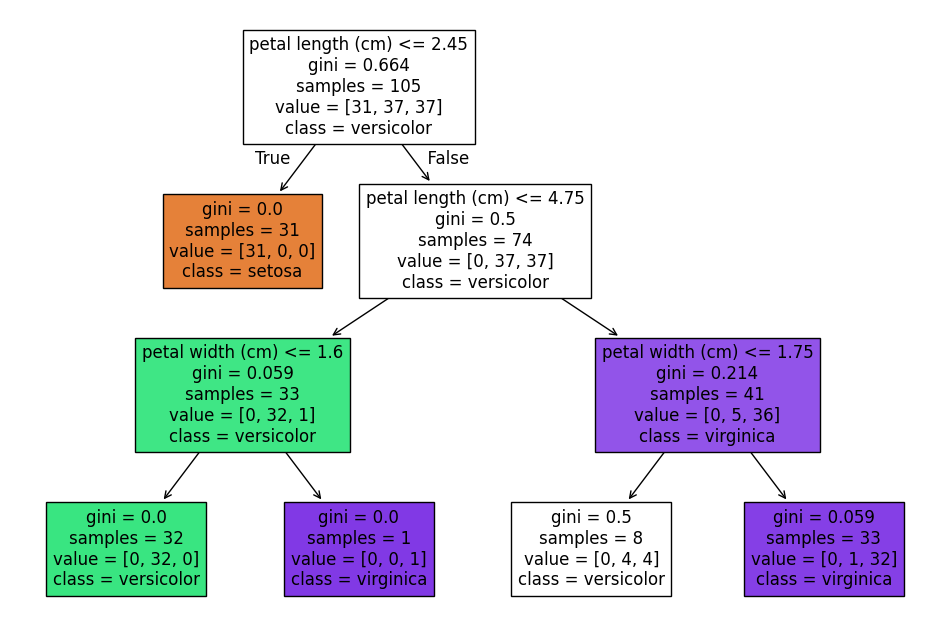

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## Cuarto Punto

### Conversion de habla a texto
Para este ejercicio hemos elegido 4 audios, cada uno contiene una frase para ser convertida a texto.

Usaremos una Api de Google para comparar contra un modelo pre-entrenado de Facebook AI

In [2]:
# Instalar librerias necesarias
!pip install SpeechRecognition pydub
!apt-get install ffmpeg -y

# Descargar los audios de prueba
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1yIMyk4LQsjKuLjw9FgQPsrcrldKCzKtB' -O voice1.wav
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1MZCrPwQHmkIn1s2O0pdsCanexn8QrQhl' -O voice2.wav
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1EY8p-UJb7YiIgHrW34t-RzUwKeD1eSt_' -O voice3.wav
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1jHUlQ1fw9bFf48ns7cSsu4Wi0Co26BQi' -O voice4.wav

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 21.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
--2025-02-12 02:38:04--  https://drive.google.com/uc?export=download&id=1yIMyk4LQsjKuLjw9FgQPsrcrldKCzKtB
Resolving drive.google.com (drive.google.com)... 142.251.167.101, 142.251.167.139, 142.251.167.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1yIMyk4LQsjKuLjw9FgQPsrcrldKCzKtB&export=download [following]
--2025-02-12 02:38:05--  https://drive.usercontent.google.com/download?id=1yIMyk4LQsjKuLjw9FgQPsrcrldKCzKtB&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4

### Google API

In [3]:
from IPython.display import Audio


import speech_recognition as sr
recognizer = sr.Recognizer()

# Audios de prueba
audio_files = ["voice1.wav", "voice2.wav", "voice3.wav", "voice4.wav"]
audio_data_array = []

for file in audio_files:
    with sr.AudioFile(file) as source:
        audio_data = recognizer.record(source)
        audio_data_array.append(audio_data)

# Convertir a texto
texto = [recognizer.recognize_google(voice_line, language="en-US") for voice_line in audio_data_array]


### Modelo pre-entrenado

In [5]:
import torch
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import librosa

# Load the pre-trained processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

# Store transcriptions
transcriptions = []

# Process each audio file
for file_path in audio_files:
    # Load the audio file (convert to 16kHz if needed)
    waveform, rate = librosa.load(file_path, sr=16000)

    # Process the audio for the model
    input_values = processor(waveform, return_tensors="pt", sampling_rate=16000).input_values

    # Perform inference
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode the predicted text
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    # Store the transcription
    transcriptions.append(transcription)


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
print("Google API: " + texto[0])
print("Modelo pre-entrenado: " + transcriptions[0])
Audio("voice1.wav")

Google API: now you will experience the full power of the dark side
Modelo pre-entrenado: NOW YOU WILL EXPERIENCE THE FULL POWER OF THE DARK SHIDE


In [9]:
print("Google API: " + texto[1])
print("Modelo pre-entrenado: " + transcriptions[1])
Audio("voice2.wav")

Google API: good Let the hate flow through you
Modelo pre-entrenado: GOOD LET THE HEAT FLOW THROUGH YOU


In [10]:
print("Google API: " + texto[2])
print("Modelo pre-entrenado: " + transcriptions[2])
Audio("voice3.wav")

Google API: do what must be done do not hesitate show no mercy
Modelo pre-entrenado: DO WHAT MUST BE DONE DO NOT HESITATE SHOW NO MERCY


In [11]:
print("Google API: " + texto[3])
print("Modelo pre-entrenado: " + transcriptions[3])
Audio("voice4.wav")

Google API: now at the end do you understand
Modelo pre-entrenado: NOW AT THE EN DO YOU UNDERSTAND
